In [1]:
import pandas as pd
import joblib
from data_processing.main import read_scoreset
from tqdm import tqdm
from pathlib import Path
from data_processing.mapping_nbs import mapping_utils
from data_processing.mapping_nbs import plotting
pd.set_option('display.max_columns', 500)

dataset_name = "Hu_BRCA2_HDR"
dataset_path = Path("/data/dzeiberg/mave_calibration/data/") / dataset_name
assert dataset_path.exists()

In [2]:
metadata, gene_info, gnomAD_df, spliceAI_df, clinvar_df = mapping_utils.load_mapping_data()

In [3]:
scoreset = read_scoreset(dataset_path / "scoreset.csv")

In [4]:
scoreset.head()

,Amino acid position,hgvs_pro,protein change2,coding nucleotide change,score,HDR 95% CI lower,HDR 95% CI upper,HDR function,BRCA2 sub-domain,Secondary-structure elements,DSS1 or ssDNA contacting residues,"Hotspot amino acid position (y, yes; n, no)",Standard variants,BayesDel,"BayesDel prediction (Ambry BRCA2 cutoff: > 0.431 damaging, <0.056 neutral)","BayesDel prediction (ClinGen cutoff: damaging Strong≥0.5, \nModerate 0.27 to 0.5, Supporting 0.13 to 0.27; neutral Supp -0.36 to -0.18, Moderate ≤-0.36.",BRCA_ML.1.1 (>0.446 damaging; <0.446 neutral),EVE¹ (>0.56026 damaging; <0.43977 neutral),ESM1b² (<-7.5 damaging; >-7.5 neutral),AlphaMissense³ (>0.564 damaging; <0.34 neutral),SpliceAI,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,BRCA_ML Training set,Reported in current study (=1),Previous publications,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,synonymous,nonsense
0,2483,p.Ser2483Asn,S2483N,c.7448G>A,5.093829,4.411474,5.864636,Normal,HD,HDα1,-,-,Benign standard,-0.305090,Neutral,Neutral supporting,0.051124,0.0874970834887139,-4.843,0.0726,0.35,0.06,0.0,0.0,AG,-,Yes,-,5.09382914691234,5.09,-,5.1,-,-,False,False
1,2484,p.Leu2484His,L2484H,c.7451T>A,3.776840,3.278966,4.346223,Normal,HD,HDα1,-,-,NaN,0.136703,Uncertain,Damaging supporting,0.450486,0.632908168778446,-6.218,0.2804,0.00,0.01,0.0,0.0,-,-,No,-,-,3.77683993340309,-,-,-,-,False,False
2,2488,p.Arg2488Gly,R2488G,c.7462A>G,2.919432,2.600069,3.277462,Normal,HD,HDα1,-,y,NaN,0.214790,Uncertain,Damaging supporting,0.136325,0.669657407958387,-4.230,0.5661,0.03,0.00,0.0,0.0,-,-,Yes,-,2.9194317516025055,2.92,-,2.92,2.92,-,False,False
3,2488,p.Arg2488Ser,R2488S,c.7464A>C,2.964786,2.734104,3.215886,Normal,HD,HDα1,-,y,NaN,0.131450,Uncertain,Damaging supporting,0.123785,0.655391308825158,-2.832,0.8086,0.03,0.00,0.0,0.0,-,-,Yes,-,2.9647858630456714,2.96,-,2.44,2.44,-,False,False
4,2489,p.Asp2489Tyr,D2489Y,c.7465G>T,4.581064,3.976894,5.271930,Normal,HD,HDα1,-,y,NaN,0.172375,Uncertain,Damaging supporting,0.147553,0.578466860260174,-4.547,0.1330,0.01,0.05,0.0,0.0,-,-,No,-,-,4.58106432124479,-,-,-,-,False,False


In [13]:
scoreset.shape

(462, 35)

In [5]:
scoreset = scoreset.rename(columns={"coding nucleotide change": "hgvs_nuc"})

In [6]:
scoreset

,Amino acid position,hgvs_pro,protein change2,hgvs_nuc,score,HDR 95% CI lower,HDR 95% CI upper,HDR function,BRCA2 sub-domain,Secondary-structure elements,DSS1 or ssDNA contacting residues,"Hotspot amino acid position (y, yes; n, no)",Standard variants,BayesDel,"BayesDel prediction (Ambry BRCA2 cutoff: > 0.431 damaging, <0.056 neutral)","BayesDel prediction (ClinGen cutoff: damaging Strong≥0.5, \nModerate 0.27 to 0.5, Supporting 0.13 to 0.27; neutral Supp -0.36 to -0.18, Moderate ≤-0.36.",BRCA_ML.1.1 (>0.446 damaging; <0.446 neutral),EVE¹ (>0.56026 damaging; <0.43977 neutral),ESM1b² (<-7.5 damaging; >-7.5 neutral),AlphaMissense³ (>0.564 damaging; <0.34 neutral),SpliceAI,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,BRCA_ML Training set,Reported in current study (=1),Previous publications,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,synonymous,nonsense
0,2483,p.Ser2483Asn,S2483N,c.7448G>A,5.093829,4.411474,5.864636,Normal,HD,HDα1,-,-,Benign standard,-0.305090,Neutral,Neutral supporting,0.051124,0.0874970834887139,-4.843,0.0726,0.35,0.06,0.0,0.0,AG,-,Yes,-,5.09382914691234,5.09,-,5.1,-,-,False,False
1,2484,p.Leu2484His,L2484H,c.7451T>A,3.776840,3.278966,4.346223,Normal,HD,HDα1,-,-,NaN,0.136703,Uncertain,Damaging supporting,0.450486,0.632908168778446,-6.218,0.2804,0.00,0.01,0.0,0.0,-,-,No,-,-,3.77683993340309,-,-,-,-,False,False
2,2488,p.Arg2488Gly,R2488G,c.7462A>G,2.919432,2.600069,3.277462,Normal,HD,HDα1,-,y,NaN,0.214790,Uncertain,Damaging supporting,0.136325,0.669657407958387,-4.230,0.5661,0.03,0.00,0.0,0.0,-,-,Yes,-,2.9194317516025055,2.92,-,2.92,2.92,-,False,False
3,2488,p.Arg2488Ser,R2488S,c.7464A>C,2.964786,2.734104,3.215886,Normal,HD,HDα1,-,y,NaN,0.131450,Uncertain,Damaging supporting,0.123785,0.655391308825158,-2.832,0.8086,0.03,0.00,0.0,0.0,-,-,Yes,-,2.9647858630456714,2.96,-,2.44,2.44,-,False,False
4,2489,p.Asp2489Tyr,D2489Y,c.7465G>T,4.581064,3.976894,5.271930,Normal,HD,HDα1,-,y,NaN,0.172375,Uncertain,Damaging supporting,0.147553,0.578466860260174,-4.547,0.1330,0.01,0.05,0.0,0.0,-,-,No,-,-,4.58106432124479,-,-,-,-,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,3180,p.Leu3180Arg,L3180R,c.9539T>G,2.930243,2.541791,3.378802,Normal,OB3,OB3α3,-,y,NaN,0.334981,Uncertain,Damaging moderate,0.431562,0.644055141916669,-5.581,0.5660,0.00,0.00,0.0,0.0,-,-,No,-,-,2.93024291940112,-,-,-,-,False,False
458,3183,p.Ile3183Val,I3183V,c.9547A>G,4.748876,4.117611,5.468699,Normal,OB3,OB3α3,-,-,NaN,-0.262217,Neutral,Neutral supporting,0.027580,0.121185920580215,-4.582,0.0833,0.00,0.00,0.0,0.0,-,-,No,1,-,-,-,-,-,-,False,False
459,3184,p.Leu3184Pro,L3184P,c.9551T>C,3.286415,2.852996,3.783462,Normal,OB3,OB3α3,-,-,NaN,0.212001,Uncertain,Damaging supporting,0.074636,0.662554249981647,-6.075,0.4416,0.00,0.00,0.0,0.0,-,-,No,1,-,-,-,-,-,-,False,False
460,3187,p.Asn3187Lys,N3187K,c.9561T>A,4.603071,4.096453,5.170082,Normal,OB3,-,-,-,NaN,-0.196166,Neutral,Neutral supporting,0.115234,0.366808212331281,-2.957,0.1192,0.00,0.00,0.0,0.0,-,-,No,-,-,4.6,-,-,-,-,False,False


In [7]:
if 'author_transcript' not in scoreset.columns or scoreset.author_transcript.isna().all():
    AUTHOR_TRANSCRIPT = gene_info.loc[metadata.loc[dataset_name],'MANE_RefSeq_nuc'].values[0].split(".")[0]
else:
    AUTHOR_TRANSCRIPT = scoreset.author_transcript.iloc[0].split(".")[0]

In [8]:
AUTHOR_TRANSCRIPT

'NM_000059'

In [9]:
clinvar_nuc_summaries = clinvar_df[(clinvar_df.transcript_base == AUTHOR_TRANSCRIPT) & (clinvar_df.hgvs_nuc.isin(scoreset.hgvs_nuc))].groupby("hgvs_nuc").apply(mapping_utils.summarize_clinvar_group)

/tmp/ipykernel_2730254/3958393697.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clinvar_nuc_summaries = clinvar_df[(clinvar_df.transcript_base == AUTHOR_TRANSCRIPT) & (clinvar_df.hgvs_nuc.isin(scoreset.hgvs_nuc))].groupby("hgvs_nuc").apply(mapping_utils.summarize_clinvar_group)


In [10]:
scoreset.set_index("hgvs_nuc", inplace=True)

In [11]:
scoreset_w_clinvar = pd.merge(scoreset,clinvar_nuc_summaries,
                            left_index=True,
                            right_index=True,
                            how="left",
                            validate="one_to_one",
                            suffixes=("","_clinvar"))

In [12]:
scoreset_w_clinvar.shape[0]

462

In [14]:
scoreset_w_clinvar.head()

,Amino acid position,hgvs_pro,protein change2,score,HDR 95% CI lower,HDR 95% CI upper,HDR function,BRCA2 sub-domain,Secondary-structure elements,DSS1 or ssDNA contacting residues,"Hotspot amino acid position (y, yes; n, no)",Standard variants,BayesDel,"BayesDel prediction (Ambry BRCA2 cutoff: > 0.431 damaging, <0.056 neutral)","BayesDel prediction (ClinGen cutoff: damaging Strong≥0.5, \nModerate 0.27 to 0.5, Supporting 0.13 to 0.27; neutral Supp -0.36 to -0.18, Moderate ≤-0.36.",BRCA_ML.1.1 (>0.446 damaging; <0.446 neutral),EVE¹ (>0.56026 damaging; <0.43977 neutral),ESM1b² (<-7.5 damaging; >-7.5 neutral),AlphaMissense³ (>0.564 damaging; <0.34 neutral),SpliceAI,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,BRCA_ML Training set,Reported in current study (=1),Previous publications,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,synonymous,nonsense,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c.7448G>A,2483,p.Ser2483Asn,S2483N,5.093829,4.411474,5.864636,Normal,HD,HDα1,-,-,Benign standard,-0.305090,Neutral,Neutral supporting,0.051124,0.0874970834887139,-4.843,0.0726,0.35,0.06,0.0,0.0,AG,-,Yes,-,5.09382914691234,5.09,-,5.1,-,-,False,False,0.0,0.0,1.0,0.0,NM_000059.4(BRCA2):c.7448G>A (p.Ser2483Asn),1.0,0.35
c.7451T>A,2484,p.Leu2484His,L2484H,3.776840,3.278966,4.346223,Normal,HD,HDα1,-,-,NaN,0.136703,Uncertain,Damaging supporting,0.450486,0.632908168778446,-6.218,0.2804,0.00,0.01,0.0,0.0,-,-,No,-,-,3.77683993340309,-,-,-,-,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c.7462A>G,2488,p.Arg2488Gly,R2488G,2.919432,2.600069,3.277462,Normal,HD,HDα1,-,y,NaN,0.214790,Uncertain,Damaging supporting,0.136325,0.669657407958387,-4.230,0.5661,0.03,0.00,0.0,0.0,-,-,Yes,-,2.9194317516025055,2.92,-,2.92,2.92,-,False,False,0.0,0.0,1.0,0.0,NM_000059.4(BRCA2):c.7462A>G (p.Arg2488Gly),1.0,0.03
c.7464A>C,2488,p.Arg2488Ser,R2488S,2.964786,2.734104,3.215886,Normal,HD,HDα1,-,y,NaN,0.131450,Uncertain,Damaging supporting,0.123785,0.655391308825158,-2.832,0.8086,0.03,0.00,0.0,0.0,-,-,Yes,-,2.9647858630456714,2.96,-,2.44,2.44,-,False,False,0.0,0.0,1.0,0.0,NM_000059.4(BRCA2):c.7464A>C (p.Arg2488Ser),1.0,0.03
c.7465G>T,2489,p.Asp2489Tyr,D2489Y,4.581064,3.976894,5.271930,Normal,HD,HDα1,-,y,NaN,0.172375,Uncertain,Damaging supporting,0.147553,0.578466860260174,-4.547,0.1330,0.01,0.05,0.0,0.0,-,-,No,-,-,4.58106432124479,-,-,-,-,False,False,0.0,0.0,0.0,1.0,NM_000059.4(BRCA2):c.7465G>T (p.Asp2489Tyr),1.0,0.05


In [15]:
scoreset_w_clinvar[scoreset_w_clinvar.num_p_lp > 0].shape

(54, 42)

In [16]:
scoreset_w_clinvar[scoreset_w_clinvar.num_b_lb > 0].shape

(45, 42)

# Add gnomAD annotations

In [17]:
Ensembl_transcript_stable_ids = mapping_utils.translate_refseq_to_ensembl(AUTHOR_TRANSCRIPT)

In [18]:
Ensembl_transcript_stable_ids

array(['ENST00000380152'], dtype=object)

In [20]:
gnomAD_df = gnomAD_df.assign(hgvs_nuc=gnomAD_df.HGVSc.str.split(":").str[1]).set_index("hgvs_nuc")

In [21]:
gnomAD_matches = gnomAD_df[(gnomAD_df.index.isin(scoreset.index)) & \
                            (gnomAD_df.Feature_base.isin(set(Ensembl_transcript_stable_ids).union(set((AUTHOR_TRANSCRIPT,)))))].sort_values(by='AC',ascending=False)

gnomAD_matches_unique = gnomAD_matches[~gnomAD_matches.index.duplicated(keep='first')]

In [22]:
gnomAD_matches.shape[0], gnomAD_matches_unique.shape[0]

(646, 235)

In [23]:
gnomAD_matches_unique.sort_index()

,ID,QUAL,FILTER,AC,AF,vep,index,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,ALLELE_NUM,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,UNIPROT_ISOFORM,SOURCE,DOMAINS,miRNA,HGVS_OFFSET,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,LoF,LoF_filter,LoF_flags,LoF_info,hgvs_pro,Feature_base,spliceAI_scores
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c.7448G>A,rs80358967,-10.0,PASS,29,1.984800e-05,A|missense_variant|MODERATE|BRCA2|ENSG00000139...,13379,A,missense_variant,MODERATE,BRCA2,ENSG00000139618,Transcript,ENST00000380152,protein_coding,15/27,NaN,ENST00000380152.8:c.7448G>A,ENSP00000369497.3:p.Ser2483Asn,7647,7448,2483,S/N,aGt/aAt,1,NaN,1,NaN,SNV,HGNC,HGNC:1101,YES,NM_000059.4,NaN,5.0,P1,CCDS9344.1,ENSP00000369497,NaN,Ensembl,Pfam:PF09169&PIRSF:PIRSF002397&PANTHER:PTHR112...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Ser2483Asn,ENST00000380152,0.35
c.7462A>G,rs746057464,-10.0,PASS,3,2.052630e-06,G|missense_variant|MODERATE|BRCA2|ENSG00000139...,13384,G,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,15/27,NaN,NM_000059.4:c.7462A>G,NP_000050.3:p.Arg2488Gly,7661,7462,2488,R/G,Aga/Gga,1,NaN,1,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Arg2488Gly,NM_000059,0.03
c.7464A>C,rs80358969,-10.0,PASS,1,6.841330e-07,C|missense_variant|MODERATE|BRCA2|ENSG00000139...,13387,C,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,15/27,NaN,NM_000059.4:c.7464A>C,NP_000050.3:p.Arg2488Ser,7663,7464,2488,R/S,agA/agC,1,NaN,1,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Arg2488Ser,NM_000059,0.03
c.7465G>T,rs1422201756,-10.0,PASS,1,6.570820e-06,T|missense_variant|MODERATE|BRCA2|ENSG00000139...,13388,T,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,15/27,NaN,NM_000059.4:c.7465G>T,NP_000050.3:p.Asp2489Tyr,7664,7465,2489,D/Y,Gat/Tat,1,NaN,1,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Asp2489Tyr,NM_000059,0.05
c.7466A>G,rs80358970,-10.0,PASS,6,4.104760e-06,G|missense_variant|MODERATE|BRCA2|ENSG00000139...,13389,G,missense_variant,MODERATE,BRCA2,ENSG00000139618,Transcript,ENST00000380152,protein_coding,15/27,NaN,ENST00000380152.8:c.7466A>G,ENSP00000369497.3:p.Asp2489Gly,7665,7466,2489,D/G,gAt/gGt,1,NaN,1,NaN,SNV,HGNC,HGNC:1101,YES,NM_000059.4,NaN,5.0,P1,CCDS9344.1,ENSP00000369497,NaN,Ensembl,Pfam:PF09169&PIRSF:PIRSF002397&PANTHER:PTHR112...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Asp2489Gly,ENST00000380152,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c.9458G>T,rs80359220,-10.0,PASS,1,6.840930e-07,T|missense_variant|MODERATE|BRCA2|ENSG00000139...,23100,T,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,25/27,NaN,NM_000059.4:c.9458G>T,NP_000050.3:p.Gly3153Val,9657,9458,3153,G/V,gGc/gTc,1,NaN,1,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Gly3153Val,NM_000059,0.00
c.9509A>G,rs80359224,-10.0,PASS,14,9.577350e-06,G|downstream_gene_variant|MODIFIER|N4BP2L1|ENS...,23684,G,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,26/27,NaN,NM_000059.4:c.9509A>G,NP_000050.3:p.Asp3170Gly,9708,9509,3170,D/G,gAc/gGc,1,NaN,1,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,N

In [24]:
scoreset_w_clinvar.head()

,Amino acid position,hgvs_pro,protein change2,score,HDR 95% CI lower,HDR 95% CI upper,HDR function,BRCA2 sub-domain,Secondary-structure elements,DSS1 or ssDNA contacting residues,"Hotspot amino acid position (y, yes; n, no)",Standard variants,BayesDel,"BayesDel prediction (Ambry BRCA2 cutoff: > 0.431 damaging, <0.056 neutral)","BayesDel prediction (ClinGen cutoff: damaging Strong≥0.5, \nModerate 0.27 to 0.5, Supporting 0.13 to 0.27; neutral Supp -0.36 to -0.18, Moderate ≤-0.36.",BRCA_ML.1.1 (>0.446 damaging; <0.446 neutral),EVE¹ (>0.56026 damaging; <0.43977 neutral),ESM1b² (<-7.5 damaging; >-7.5 neutral),AlphaMissense³ (>0.564 damaging; <0.34 neutral),SpliceAI,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,BRCA_ML Training set,Reported in current study (=1),Previous publications,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,synonymous,nonsense,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c.7448G>A,2483,p.Ser2483Asn,S2483N,5.093829,4.411474,5.864636,Normal,HD,HDα1,-,-,Benign standard,-0.305090,Neutral,Neutral supporting,0.051124,0.0874970834887139,-4.843,0.0726,0.35,0.06,0.0,0.0,AG,-,Yes,-,5.09382914691234,5.09,-,5.1,-,-,False,False,0.0,0.0,1.0,0.0,NM_000059.4(BRCA2):c.7448G>A (p.Ser2483Asn),1.0,0.35
c.7451T>A,2484,p.Leu2484His,L2484H,3.776840,3.278966,4.346223,Normal,HD,HDα1,-,-,NaN,0.136703,Uncertain,Damaging supporting,0.450486,0.632908168778446,-6.218,0.2804,0.00,0.01,0.0,0.0,-,-,No,-,-,3.77683993340309,-,-,-,-,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c.7462A>G,2488,p.Arg2488Gly,R2488G,2.919432,2.600069,3.277462,Normal,HD,HDα1,-,y,NaN,0.214790,Uncertain,Damaging supporting,0.136325,0.669657407958387,-4.230,0.5661,0.03,0.00,0.0,0.0,-,-,Yes,-,2.9194317516025055,2.92,-,2.92,2.92,-,False,False,0.0,0.0,1.0,0.0,NM_000059.4(BRCA2):c.7462A>G (p.Arg2488Gly),1.0,0.03
c.7464A>C,2488,p.Arg2488Ser,R2488S,2.964786,2.734104,3.215886,Normal,HD,HDα1,-,y,NaN,0.131450,Uncertain,Damaging supporting,0.123785,0.655391308825158,-2.832,0.8086,0.03,0.00,0.0,0.0,-,-,Yes,-,2.9647858630456714,2.96,-,2.44,2.44,-,False,False,0.0,0.0,1.0,0.0,NM_000059.4(BRCA2):c.7464A>C (p.Arg2488Ser),1.0,0.03
c.7465G>T,2489,p.Asp2489Tyr,D2489Y,4.581064,3.976894,5.271930,Normal,HD,HDα1,-,y,NaN,0.172375,Uncertain,Damaging supporting,0.147553,0.578466860260174,-4.547,0.1330,0.01,0.05,0.0,0.0,-,-,No,-,-,4.58106432124479,-,-,-,-,False,False,0.0,0.0,0.0,1.0,NM_000059.4(BRCA2):c.7465G>T (p.Asp2489Tyr),1.0,0.05


In [25]:
gnomAD_matches_unique.head()

,ID,QUAL,FILTER,AC,AF,vep,index,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,ALLELE_NUM,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,UNIPROT_ISOFORM,SOURCE,DOMAINS,miRNA,HGVS_OFFSET,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,LoF,LoF_filter,LoF_flags,LoF_info,hgvs_pro,Feature_base,spliceAI_scores
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c.8851G>A,rs11571769,-10.0,PASS,9893,0.006769,A|missense_variant|MODERATE|BRCA2|ENSG00000139...,19497,A,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,22/27,NaN,NM_000059.4:c.8851G>A,NP_000050.3:p.Ala2951Thr,9050,8851,2951,A/T,Gcc/Acc,1,NaN,1,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Ala2951Thr,NM_000059,0.00
c.7469T>C,rs11571707,-10.0,PASS,6401,0.004379,C|missense_variant|MODERATE|BRCA2|ENSG00000139...,13393,C,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,15/27,NaN,NM_000059.4:c.7469T>C,NP_000050.3:p.Ile2490Thr,7668,7469,2490,I/T,aTa/aCa,1,NaN,1,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Ile2490Thr,NM_000059,0.05
c.8182G>A,rs28897749,-10.0,PASS,5408,0.003699,A|missense_variant|MODERATE|BRCA2|ENSG00000139...,15522,A,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,18/27,NaN,NM_000059.4:c.8182G>A,NP_000050.3:p.Val2728Ile,8381,8182,2728,V/I,Gtt/Att,1,NaN,1,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Val2728Ile,NM_000059,0.00
c.8567A>C,rs11571747,-10.0,PASS,3740,0.002558,C|missense_variant|MODERATE|BRCA2|ENSG00000139...,17413,C,missense_variant,MODERATE,BRCA2,ENSG00000139618,Transcript,ENST00000380152,protein_coding,20/27,NaN,ENST00000380152.8:c.8567A>C,ENSP00000369497.3:p.Glu2856Ala,8766,8567,2856,E/A,gAg/gCg,1,NaN,1,NaN,SNV,HGNC,HGNC:1101,YES,NM_000059.4,NaN,5.0,P1,CCDS9344.1,ENSP00000369497,NaN,Ensembl,Gene3D:6&Gene3D:6&Pfam:PF09121&PIRSF:PIRSF0023...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Glu2856Ala,ENST00000380152,0.00
c.8149G>T,rs28897747,-10.0,PASS,2053,0.001404,T|missense_variant|MODERATE|BRCA2|ENSG00000139...,15491,T,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,18/27,NaN,NM_000059.4:c.8149G>T,NP_000050.3:p.Ala2717Ser,8348,8149,2717,A/S,Gcc/Tcc,1,NaN,1,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Ala2717Ser,NM_000059,0.03


In [26]:
gnomAD_matches_unique.index.has_duplicates

False

In [27]:
scoreset_processed = pd.merge(scoreset_w_clinvar,gnomAD_matches_unique,
                                        left_index=True,right_index=True,how="left",validate="one_to_one")#.reset_index()

In [28]:
scoreset_processed.shape

(462, 98)

In [29]:
scoreset_processed[scoreset_processed.AC >= 1]

,Amino acid position,hgvs_pro_x,protein change2,score,HDR 95% CI lower,HDR 95% CI upper,HDR function,BRCA2 sub-domain,Secondary-structure elements,DSS1 or ssDNA contacting residues,"Hotspot amino acid position (y, yes; n, no)",Standard variants,BayesDel,"BayesDel prediction (Ambry BRCA2 cutoff: > 0.431 damaging, <0.056 neutral)","BayesDel prediction (ClinGen cutoff: damaging Strong≥0.5, \nModerate 0.27 to 0.5, Supporting 0.13 to 0.27; neutral Supp -0.36 to -0.18, Moderate ≤-0.36.",BRCA_ML.1.1 (>0.446 damaging; <0.446 neutral),EVE¹ (>0.56026 damaging; <0.43977 neutral),ESM1b² (<-7.5 damaging; >-7.5 neutral),AlphaMissense³ (>0.564 damaging; <0.34 neutral),SpliceAI,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,BRCA_ML Training set,Reported in current study (=1),Previous publications,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,synonymous,nonsense,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max,ID,QUAL,FILTER,AC,AF,vep,index,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,ALLELE_NUM,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,UNIPROT_ISOFORM,SOURCE,DOMAINS,miRNA,HGVS_OFFSET,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,LoF,LoF_filter,LoF_flags,LoF_info,hgvs_pro_y,Feature_base,spliceAI_scores
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c.7448G>A,2483,p.Ser2483Asn,S2483N,5.093829,4.411474,5.864636,Normal,HD,HDα1,-,-,Benign standard,-0.305090,Neutral,Neutral supporting,0.051124,0.0874970834887139,-4.843,0.0726,0.35,0.06,0.0,0.0,AG,-,Yes,-,5.09382914691234,5.09,-,5.1,-,-,False,False,0.0,0.0,1.0,0.0,NM_000059.4(BRCA2):c.7448G>A (p.Ser2483Asn),1.0,0.35,rs80358967,-10.0,PASS,29.0,1.984800e-05,A|missense_variant|MODERATE|BRCA2|ENSG00000139...,13379.0,A,missense_variant,MODERATE,BRCA2,ENSG00000139618,Transcript,ENST00000380152,protein_coding,15/27,NaN,ENST00000380152.8:c.7448G>A,ENSP00000369497.3:p.Ser2483Asn,7647.0,7448.0,2483.0,S/N,aGt/aAt,1.0,NaN,1.0,NaN,SNV,HGNC,HGNC:1101,YES,NM_000059.4,NaN,5.0,P1,CCDS9344.1,ENSP00000369497,NaN,Ensembl,Pfam:PF09169&PIRSF:PIRSF002397&PANTHER:PTHR112...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Ser2483Asn,ENST00000380152,0.35
c.7462A>G,2488,p.Arg2488Gly,R2488G,2.919432,2.600069,3.277462,Normal,HD,HDα1,-,y,NaN,0.214790,Uncertain,Damaging supporting,0.136325,0.669657407958387,-4.230,0.5661,0.03,0.00,0.0,0.0,-,-,Yes,-,2.9194317516025055,2.92,-,2.92,2.92,-,False,False,0.0,0.0,1.0,0.0,NM_000059.4(BRCA2):c.7462A>G (p.Arg2488Gly),1.0,0.03,rs746057464,-10.0,PASS,3.0,2.052630e-06,G|missense_variant|MODERATE|BRCA2|ENSG00000139...,13384.0,G,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,15/27,NaN,NM_000059.4:c.7462A>G,NP_000050.3:p.Arg2488Gly,7661.0,7462.0,2488.0,R/G,Aga/Gga,1.0,NaN,1.0,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Arg2488Gly,NM_000059,0.03
c.7464A>C,2488,p.Arg2488Ser,R2488S,2.964786,2.734104,3.215886,Normal,HD,HDα1,-,y,NaN,0.131450,Uncertain,Damaging supporting,0.123785,0.655391308825158,-2.832,0.8086,0.03,0.00,0.0,0.0,-,-,Yes,-,2.9647858630456714,2.96,-,2.44,2.44,-,False,False,0.0,0.0,1.0,0.0,NM_000059.4(BRCA2):c.7464A>C (p.Arg2488Ser),1.0,0.03,rs80358969,-10.0,PASS,1.0,6.841330e-07,C|missense_variant|MODERATE|BRCA2|ENSG00000139...,13387.0,C,missense_variant,MODERATE,BRCA2,675,Transcript,NM_000059.4,protein_coding,15/27,NaN,NM_000059.4:c.7464A>C,NP_000050.3:p.Arg2488Ser,7663.0,7464.0,2488.0,R/S,agA/agC,1.0,NaN,1.0,NaN,SNV,EntrezGene,HGNC:1101,YES,ENST00000380152.8,NaN,NaN,NaN,NaN,NP_000050.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Arg2488Ser,NM_000059,0.03
c.7465G>T,2489,p.Asp2489Tyr,D2489Y,4

In [30]:
scoreset_processed.to_csv(dataset_path / "scoreset_processed.csv",index=False)

# Reload Processed

In [29]:
scoreset_processed = pd.read_csv(dataset_path / "scoreset_processed.csv")

In [31]:
def conflicting_interpretations(r):
    """
    Check if a record has conflicting interpretations
    P/LP and B/LB ; P/LP and VUS ; B/LB and VUS ; P/LP and conflicting ; B/LB and conflicting
    If data is mapped at the protein level, this could be a result of different RNA substitutions
    If data is mapped at the RNA level, this is a true conflict

    Parameters
    ----------
    r : pd.Series
        A record from the ClinVar data frame

    Returns
    -------
    bool
        True if there are conflicting interpretations, False otherwise
    """
    return r.num_p_lp > 0 and r.num_b_lb > 0 or \
            r.num_p_lp > 0 and r.num_VUS > 0 or \
            r.num_b_lb > 0 and r.num_VUS > 0 or \
            r.num_p_lp > 0 and r.num_conflicting > 0 or \
            r.num_b_lb > 0 and r.num_conflicting > 0


def is_pathogenic(r):
    return r.num_p_lp > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_benign(r):
    return r.num_b_lb > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_vus(r):
    return r.num_VUS > 0

def is_conflicting(r):
    return r.num_conflicting > 0

def is_gnomAD(r):
    return r.AF > 0 and r.spliceAI_scores <= .5

def is_synonymous(r):
    return r.synonymous and r.num_p_lp == 0 and r.clinvar_spliceAI_max <= .5



In [34]:
INVERT_SCORES = False

sample_data = {
    "P/LP" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_pathogenic(r),axis=1)],
    "B/LB" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_benign(r),axis=1)],
    'gnomAD': scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_gnomAD(r),axis=1)],
    'synonymous' : scoreset_processed[scoreset_processed.apply(is_synonymous,axis=1)],
}
sample_data = {k : v for k,v in sample_data.items() if len(v)}

if INVERT_SCORES:
    for k in sample_data:
        sample_data[k] = sample_data[k].assign(score= -sample_data[k].score)


In [35]:
for sample_name, sample in sample_data.items():
    print(f"{sample_name}: {sample.shape[0]}")

P/LP: 49
B/LB: 45
gnomAD: 233


(<Figure size 1200x900 with 3 Axes>,
 array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>], dtype=object))

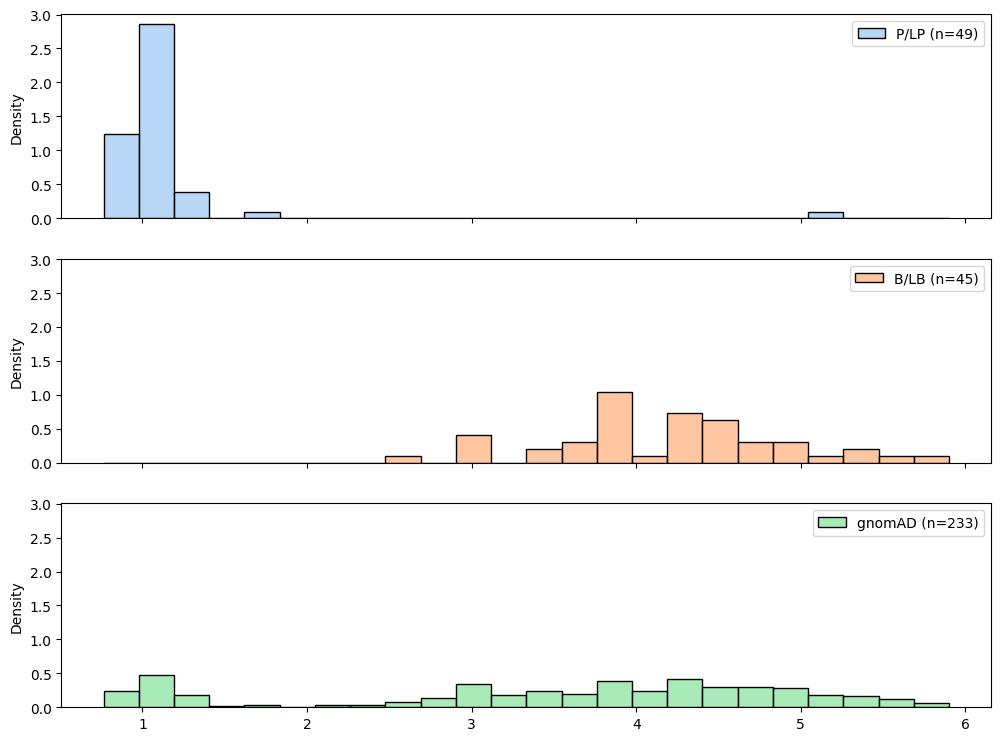

In [36]:
plotting.plot_samples({k : v.score.values for k,v in sample_data.items()})

In [39]:
if "synonymous" in sample_data:
    pd.DataFrame.from_records([*[dict(sample_name='P/LP',score=score) for score in sample_data['P/LP'].score.values],
                                *[dict(sample_name='B/LB',score=score) for score in sample_data['B/LB'].score.values],
                                *[dict(sample_name='gnomAD',score=score) for score in sample_data['gnomAD'].score.values],
                                *[dict(sample_name='synonymous',score=score) for score in sample_data['synonymous'].score.values]]).to_csv(dataset_path / "samples.csv",index=False)
else:
    pd.DataFrame.from_records([*[dict(sample_name='P/LP',score=score) for score in sample_data['P/LP'].score.values],
                                *[dict(sample_name='B/LB',score=score) for score in sample_data['B/LB'].score.values],
                                *[dict(sample_name='gnomAD',score=score) for score in sample_data['gnomAD'].score.values]]).to_csv(dataset_path / "samples.csv",index=False)